In [7]:
from helpers import *
from create_album_jsons import *
import json
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
rankings = [
    {
        'album': 'Even in Arcadia',
        'artist': 'Sleep Token',
        'spotify_id': '1lS7FeRcSUuIGqyg99UGpj',
        'Yagiz': [1, 3, 0, 8, 5],
        'Tugba': [1, 3, 7, 0, 5],
        'date': '29.05.2025',
        'yagiz_score': 8.1,
        'tugba_score': 8.0,
    },
    {
        'album': 'The New Abnormal',
        'artist': 'The Strokes',
        'spotify_id': '2xkZV2Hl1Omi8rk2D7t5lN',
        'Yagiz': [0, 8, 6, 2, 1],
        'Tugba': [8, 1, 0, 2, 6],
        'date': '31.05.2025',
        'yagiz_score': 7.9,
        'tugba_score': 9.2,
    },

    {
        'album': 'BODIES',
        'artist': 'Thornhill',
        'spotify_id': '5bJeb7bvHrxNvZ6UskCoqm',
        'Yagiz': [1, 2, 10, 9, 5],
        'Tugba': [10, 2, 3, 5, 1],
        'date': '11.06.2025',
        'yagiz_score': 9.2,
        'tugba_score': 9.0,
    },

    {
        'album': 'Skinty Fia',
        'artist': 'Fontaines D.C.',
        'spotify_id': '0aVN6rMKthfuAdDXn8RTXf',
        'Yagiz': [8, 5, 0, 7, 3],
        'Tugba': [8, 3, 5, 1, 4],
        'date': '12.06.2025',
        'yagiz_score': 8.4,
        'tugba_score': 8.7,
    },
    {
        'album': 'Radiant Dark',
        'artist': 'If I Were You',
        'spotify_id': '2qGyywbFxucSBkPMPgfQ2w',
        'Yagiz': [5, 2, 9, 1, 0],
        'Tugba': [2, 4, 9, 5, 1],
        'date': '18.06.2025',
        'yagiz_score': 8.4,
        'tugba_score': 7.5,
    },
    {
        'album': 'Boxer',
        'artist': 'The National',
        'spotify_id': '2pG7mDkQhia2OyGE6fbkmJ',
        'Yagiz': [1, 5, 0, 6, 9],
        'Tugba': [1, 6, 0, 11, 5],
        'date': '24.06.2025',
        'yagiz_score': 7.3,
        'tugba_score': 7.7,
    },
    {
        'album': 'Take Me Back To Eden',
        'artist': 'Sleep Token',
        'spotify_id': '1gjugH97doz3HktiEjx2vY',
        'Yagiz': [7, 10, 9, 4, 0],
        'Tugba': [10, 7, 9, 0, 2],
        'date': '25.06.2025',
        'yagiz_score': 8.5,
        'tugba_score': 8.1,
    },
    {
        'album': 'Origin of Symmetry',
        'artist': 'Muse',
        'spotify_id': '1Dh27pjT3IEdiRG9Se5uQn',
        'Yagiz': [4, 0, 11, 9, 5],
        'Tugba': [4, 1, 5, 0, 2],
        'date': '02.07.2025',
        'yagiz_score': 7.4,
        'tugba_score': 7.9,
    },
    {
        'album': 'Fatalism',
        'artist': 'Polaris',
        'spotify_id': '6yMmUKkAfVoHJT71ZpoBi5',
        'Yagiz': [5, 1, 7, 0, 4],
        'Tugba': [7, 4, 3, 0, 1],
        'date': '06.07.2025',
        'yagiz_score': 8.8,
        'tugba_score': 8.3,
    },
    {
        'album': 'Disintegration',
        'artist': 'The Cure',
        'spotify_id': '6DZNOsLXIU2zOQfQDwDpIS',
        'Yagiz': [5, 3, 6, 1, 9],
        'Tugba': [3, 9, 5, 1, 4],
        'date': '09.07.2025',
        'yagiz_score': 7.8,
        'tugba_score': 8.5,
    },
    {
        'album': 'The Silver Scream',
        'artist': 'Ice Nine Kills',
        'spotify_id': '3DVjLNjzyZBVc8eZcJoulz',
        'Yagiz': [2, 12, 6, 7, 0],
        'Tugba': [5, 2, 12, 0, 11],
        'date': '13.07.2025',
        'yagiz_score': 9.0,
        'tugba_score': 8.8,
    },
    {
        'album': "(What's the Story) Morning Glory?",
        'artist': 'Oasis',
        'spotify_id': '6Srtm8a14PDdrpRUdvUdEO',
        'Yagiz': [11, 3, 2, 9, 1],
        'Tugba': [11, 3, 2, 9, 6],
        'date': '23.07.2025',
        'yagiz_score': 8.1,
        'tugba_score': 8.8,
    },
    
    {
        'album': "Stargazer",
        'artist': 'Moodring',
        'spotify_id': '6xKM5VYZoDt0H0mPu2Blru',
        'Yagiz': [10, 6, 9, 1, 8],
        'Tugba': [1, 4, 5, 7, 2],
        'date': '29.07.2025',
        'yagiz_score': 8.6,
        'tugba_score': 8.6,
    },


]

ranking_df = pd.DataFrame(rankings)

In [9]:
ranking_loss_df = compute_ranking_losses_extended(ranking_df)
ranking_loss_df = extend_df_with_spotify(ranking_loss_df)

with open('baseline_loss_stats.json') as f:
    baseline_stats = json.load(f)
    
for col in ['y_vs_t', 'y_vs_s', 't_vs_s']:
    loss_col = f'loss_{col}'
    sim_col = f'similarity_{col}'
    ranking_loss_df[sim_col] = ranking_loss_df.apply(
        lambda row: compute_similarity_score(row[loss_col], baseline_stats, row['total_songs']), axis=1
    )
    
similarity_df = ranking_loss_df[[
    'album', 'artist', 'spotify_id', 'total_songs',
    'Yagiz', 'Tugba', 'Spotify',
    'similarity_y_vs_t', 'similarity_y_vs_s', 'similarity_t_vs_s'
]]

similarity_df

,album,artist,spotify_id,total_songs,Yagiz,Tugba,Spotify,similarity_y_vs_t,similarity_y_vs_s,similarity_t_vs_s
0,Even in Arcadia,Sleep Token,1lS7FeRcSUuIGqyg99UGpj,10,"[1, 3, 0, 8, 5]","[1, 3, 7, 0, 5]","[3, 4, 0, 1, 8]",2.268469,1.748310,0.968071
1,The New Abnormal,The Strokes,2xkZV2Hl1Omi8rk2D7t5lN,9,"[0, 8, 6, 2, 1]","[8, 1, 0, 2, 6]","[0, 1, 8, 6, 2]",1.889631,2.177880,2.177880
2,BODIES,Thornhill,5bJeb7bvHrxNvZ6UskCoqm,11,"[1, 2, 10, 9, 5]","[10, 2, 3, 5, 1]","[7, 2, 5, 6, 1]",1.631193,0.661421,0.903864
3,Skinty Fia,Fontaines D.C.,0aVN6rMKthfuAdDXn8RTXf,10,"[8, 5, 0, 7, 3]","[8, 3, 5, 1, 4]","[8, 3, 5, 1, 7]",1.228151,1.748310,2.788629
4,Radiant Dark,If I Were You,2qGyywbFxucSBkPMPgfQ2w,10,"[5, 2, 9, 1, 0]","[2, 4, 9, 5, 1]","[2, 3, 4, 1, 0]",1.748310,0.707992,1.228151
5,Boxer,The National,2pG7mDkQhia2OyGE6fbkmJ,12,"[1, 5, 0, 6, 9]","[1, 6, 0, 11, 5]","[0, 1, 2, 3, 4]",2.217908,0.601138,0.601138
6,Take Me Back To Eden,Sleep Token,1gjugH97doz3HktiEjx2vY,12,"[7, 10, 9, 4, 0]","[10, 7, 9, 0, 2]","[1, 9, 10, 2, 0]",2.448875,1.063072,1.525006
7,Origin of Symmetry,Muse,1Dh27pjT3IEdiRG9Se5uQn,12,"[4, 0, 11, 9, 5]","[4, 1, 5, 0, 2]","[4, 9, 0, 1, 2]",1.294039,1.755973,1.986940
8,Fatalism,Polaris,6yMmUKkAfVoHJT71ZpoBi5,11,"[5, 1, 7, 0, 4]","[7, 4, 3, 0, 1]","[7, 1, 5, 0, 3]",1.146307,2.358523,1.631193
9,Disintegration,The Cure,6DZNOsLXIU2zOQfQDwDpIS,12,"[5, 3, 6, 1, 9]","[3, 9, 5, 1, 4]","[1, 3, 5, 7, 4]",1.986940,1.525006,1.986940


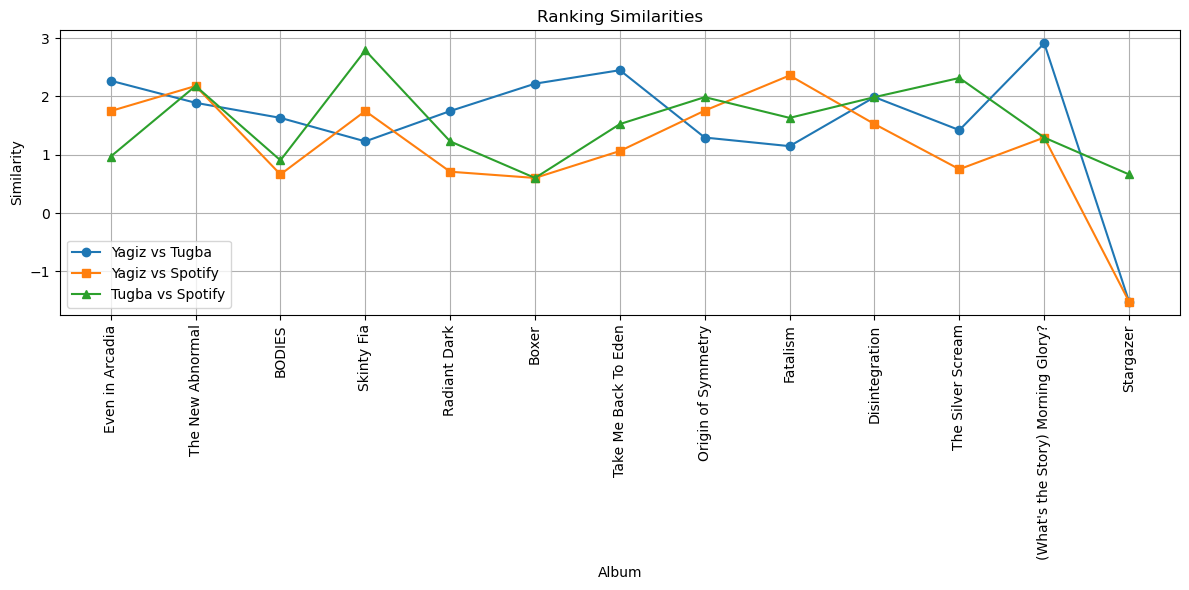

In [10]:
plot_all_ranking_similarities(similarity_df)

In [11]:
output = [
    {
        'album': row['album'],
        'artist': row['artist'],
        'spotify_id': row['spotify_id'],
        'Yagiz': row['Yagiz'],
        'Tugba': row['Tugba'],
        'Spotify': row['Spotify'],
        'similarity_y_vs_t': row['similarity_y_vs_t'],
        'similarity_y_vs_s': row['similarity_y_vs_s'],
        'similarity_t_vs_s': row['similarity_t_vs_s'],
        'total_songs': row['total_songs'],
        'date': row['date'],
        'yagiz_score': row['yagiz_score'],
        'tugba_score': row['tugba_score'],
        'mean_score': (row['yagiz_score'] + row['tugba_score']) / 2,
        'index': i
    }
    for i, row in ranking_loss_df.iterrows()
]

with open('albums.json', 'w') as f:
    json.dump(output, f, indent=2)

In [12]:
for album in rankings:
    generate_album_json(
        album_id=album['spotify_id'],
        album_slug=make_slug(album['album']),
        yagiz_ranks=album['Yagiz'],
        tugba_ranks=album['Tugba']
    )

Saved albums/even-in-arcadia.json
Saved albums/the-new-abnormal.json
Saved albums/bodies.json
Saved albums/skinty-fia.json
Saved albums/radiant-dark.json
Saved albums/boxer.json
Saved albums/take-me-back-to-eden.json
Saved albums/origin-of-symmetry.json
Saved albums/fatalism.json
Saved albums/disintegration.json
Saved albums/the-silver-scream.json
Saved albums/whats-the-story-morning-glory.json
Saved albums/stargazer.json
